In [ ]:
#important reference link 
# https://www.kaggle.com/renatobmlr/pytorch-imbalanced-classes
# https://github.com/MLWhiz/data_science_blogs/blob/master/compvisblog/Boats_Model.ipynb

In [178]:
#import
from pathlib import Path



In [179]:
#reusable functions 
import torchvision.transforms as transforms
def calculate_mean_std(dataset):
  loader = torch.utils.data.DataLoader(dataset,
                          batch_size=128,
                          num_workers=0,
                          shuffle=False)

  mean = 0.
  std = 0.
  for images, _ in loader:
      batch_samples = images.size(0) # batch size (the last batch can have smaller size!)
      images = images.view(batch_samples, images.size(1), -1)
      mean += images.mean(2).sum(0)
      std += images.std(2).sum(0)

  mean /= len(loader.dataset)
  std /= len(loader.dataset)
  mean=mean.tolist()
  std=std.tolist()
  return mean,std 
# 



import math 
import matplotlib.pyplot as plt
import numpy as np

def plot_n_image(number,trainloader,classes,mean,std,format):
    # get some random training images
    dataiter = iter(trainloader)
    images, labels = dataiter.next()
    nrows = math.floor(math.sqrt(number))
    ncols = math.ceil(math.sqrt(number))

    fig, ax = plt.subplots(nrows, ncols, figsize=(10, 15))

    for i in range(nrows):
        for j in range(ncols):
            index = i * ncols + j
            ax[i, j].axis("off")
            ax[i, j].set_title(classes[labels[index]])
            #FIRST UNNORMALIZE THEN SHOW 
            mean = np.array(mean)
            std = np.array(std)
            if format=='raw':
              ax[i, j].imshow(np.transpose(images[index].cpu().numpy(), (1, 2, 0))*std+mean, cmap="gray_r")
            elif format=='normalized':
              ax[i, j].imshow(np.transpose(images[index].cpu().numpy(), (1, 2, 0)), cmap="gray_r")
    




In [180]:
from pathlib import Path
data_path = Path('/data1/notebooks/jitendra/IMAGE_MODERATION/LEARN/IMAGES/BOAT_IMAGES')
model_path = Path('/data1/notebooks/jitendra/IMAGE_MODERATION/LEARN/models')
!ls {data_path}

buoy	     ferry boat    gondola	    kayak	sailboat
cruise ship  freight boat  inflatable boat  paper boat


In [181]:
classes=("buoy","ferry boat","gondola","kayak","sailboat",
"cruise ship", "freight boat","inflatable boat","paper boat")
len(classes)

9

In [182]:
#calculate mean and std deviation 
transform = transforms.Compose([torchvision.transforms.Resize((150,150)),torchvision.transforms.ToTensor()])
dataset = torchvision.datasets.ImageFolder(root=data_path,transform= transform)
mean,std = calculate_mean_std(dataset)
print("mean :",mean,"std :",std)
len(dataset)

mean : [0.48975372314453125, 0.520847499370575, 0.5360419154167175] std : [0.22184786200523376, 0.20855051279067993, 0.21639268100261688]


1462

In [183]:
len_dataset = len(dataset)
len_traindata = int(len_dataset*0.8)
len_testdata = len_dataset - len_traindata
len_dataset,len_traindata,len_testdata

(1462, 1169, 293)

In [184]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset,Subset
batch_size=128
num_workers=4

train_transform = transforms.Compose(
[        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(),
        transforms.RandomHorizontalFlip(),
    torchvision.transforms.Resize((150,150)),
    transforms.ToTensor(),
transforms.Normalize(mean, std)
])
test_transform = transforms.Compose(
[torchvision.transforms.Resize((150,150)),
    transforms.ToTensor(),
transforms.Normalize(mean, std)
])


class MyLazyDataset(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __getitem__(self, index):
        if self.transform:
            x = self.transform(dataset[index][0])
        else:
            x = dataset[index][0]
        y = dataset[index][1]
        return x, y
    
    def __len__(self):
        return len(dataset)
    
dataset = torchvision.datasets.ImageFolder(root=data_path)
    
traindataset = MyLazyDataset(dataset,train_transform)
valdataset = MyLazyDataset(dataset,test_transform)

train_size = 0.8
num_train = len(dataset)
indices = list(range(num_train))
split = int(np.floor(train_size * num_train))
np.random.shuffle(indices)

train_idx, valid_idx= indices[:split], indices[split:]

traindata = Subset(traindataset, indices=train_idx)
testdata = Subset(valdataset, indices=valid_idx)


trainloader = torch.utils.data.DataLoader(traindata, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)
testloader = torch.utils.data.DataLoader(testdata, batch_size=batch_size,
                                         num_workers=num_workers, shuffle=True)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


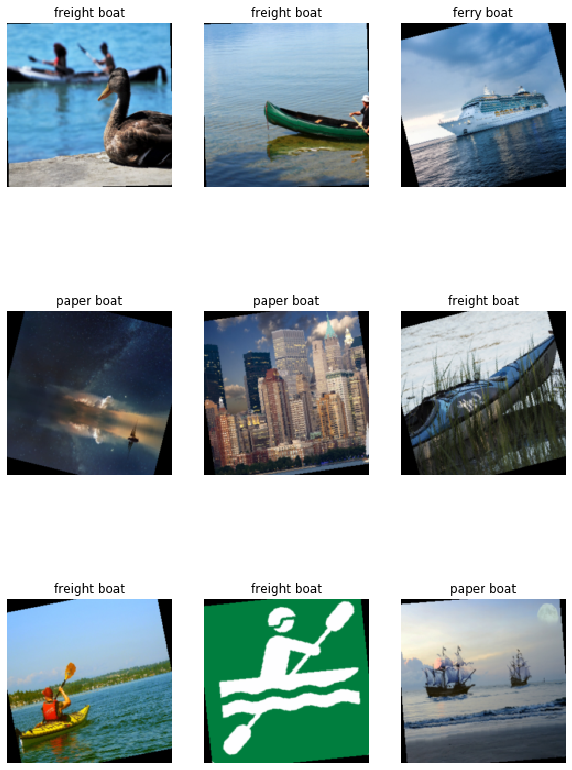

In [185]:
plot_n_image(9,trainloader,classes,mean,std,format='raw')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


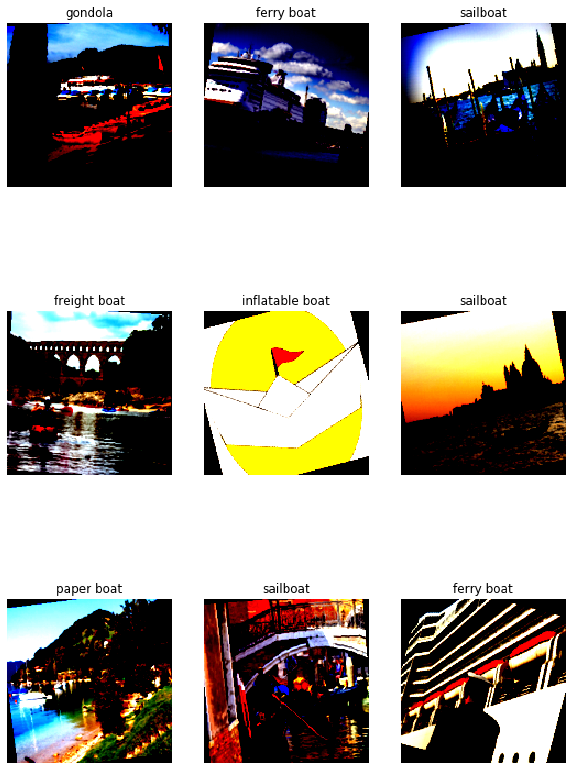

In [186]:
plot_n_image(9,trainloader,classes,mean,std,format='normalized')

In [187]:
# #checck GPU STATUS
# import torch
# from torch import cuda

# train_on_gpu = cuda.is_available()
# print(f'Train on gpu: {train_on_gpu}')

# # Number of gpus
# if train_on_gpu:
#     gpu_count = cuda.device_count()
#     print(f'{gpu_count} gpus detected.')
#     if gpu_count > 1:
#         multi_gpu = True
#     else:
#         multi_gpu = False
# print(train_on_gpu,multi_gpu)

In [188]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [189]:
#CLASS COUNT 

In [190]:
# class_count = {}
# for _, index in dataset:
#     label = classes[index]
#     if label not in class_count:
#         class_count[label] = 0
#     class_count[label] += 1
# class_count

In [191]:
#MODELLING

In [192]:
import torch, torchvision
from torchvision import datasets, transforms
from torch import nn, optim
from torch.nn import functional as F

import numpy as np
import shap

In [193]:
! pip install torchsummary 

  Using cached https://files.pythonhosted.org/packages/7d/18/1474d06f721b86e6a9b9d7392ad68bed711a02f3b61ac43f13c719db50a6/torchsummary-1.5.1-py3-none-any.whl
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/data1/anaconda3/envs/image_moderation_pytorch/lib/python3.7/site-packages/torchsummary'
Consider using the `--user` option or check the permissions.



In [194]:
# ! pip install torchsummary 
# from torchsummary import summary
import torchvision
from torchvision import  models
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

n_classes=len(classes)
model = models.resnet50(pretrained=True)
#freeze all layers 
for param in model.parameters():
    param.requires_grad = False   
num_ftrs = model.fc.in_features
# model.fc = nn.Linear(num_ftrs, 9)

n_inputs = model.fc.in_features
model.fc = nn.Sequential(
                      nn.Linear(n_inputs, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, n_classes),                   
                      nn.LogSoftmax(dim=1))
model = model.to(device)

#summary(model, input_size=(3, 32, 32))

cuda


In [195]:

total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

24,034,889 total parameters.
526,857 training parameters.


In [196]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9,weight_decay=0.001)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

In [197]:
train_dataset_size = len(traindata)
valid_dataset_size = len(testdata)

In [198]:
import time
import copy
def train_model(model, criterion, optimizer, scheduler,train_loader,test_loader, num_epochs):

    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        
        print(f"Epoch {epoch}/{num_epochs}")
        print('_'*10)
        '''Each epoch has a training and validation phase'''
        #########    Training Phase
        model.train() # Set model to training mode

        running_loss = 0.0
        running_corrects = 0.0

        for inputs,labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            #Forward (track history for train)
            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                _,preds = torch.max(outputs,1)
                loss = criterion(outputs,labels)

                #backward + optimize (only train)
                loss.backward()
                optimizer.step()


            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds==labels)

        #only train
        scheduler.step()

        epoch_loss = running_loss /train_dataset_size
        epoch_acc = running_corrects.double() / train_dataset_size

        print(f" Train Loss: {epoch_loss:.4f} Acc {epoch_acc: .4f}")


        #########   Valdatin phase
        model.eval() # Set model to evaluate mode

        running_loss = 0.0
        running_corrects = 0.0

        for inputs,labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            #Forward (track history for train)
            with torch.set_grad_enabled(False):
                outputs = model(inputs)
                _,preds = torch.max(outputs,1)
                loss = criterion(outputs,labels)


            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds==labels)

        epoch_loss = running_loss /valid_dataset_size
        epoch_acc = running_corrects.double() / valid_dataset_size

        print(f" Valid Loss: {epoch_loss:.4f} Acc {epoch_acc: .4f}")

        # Deep copy the model
        if epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model_wts = copy.deepcopy(model.state_dict())

    print()

    time_elapsed = time.time() - since

    print(f" Training completed in {time_elapsed // 60:0.0f}m {time_elapsed % 60 :0.0f}s")
    print('Best val Acc: {:4f}'.format(best_acc))


    #Load the best weights
    model.load_state_dict(best_model_wts)
    
    return model

In [199]:
model = train_model(model, criterion, optimizer, scheduler,trainloader,testloader, num_epochs=25)

Epoch 0/25
__________
 Train Loss: 1.9319 Acc  0.2806
 Valid Loss: 1.5481 Acc  0.6655
Epoch 1/25
__________
 Train Loss: 1.5679 Acc  0.5372
 Valid Loss: 1.2105 Acc  0.7304
Epoch 2/25
__________
 Train Loss: 1.2629 Acc  0.6433
 Valid Loss: 0.9736 Acc  0.7167
Epoch 3/25
__________
 Train Loss: 1.0728 Acc  0.6715
 Valid Loss: 0.9052 Acc  0.6997
Epoch 4/25
__________
 Train Loss: 0.9597 Acc  0.7100
 Valid Loss: 0.8381 Acc  0.7201
Epoch 5/25
__________
 Train Loss: 0.8572 Acc  0.7246
 Valid Loss: 0.8138 Acc  0.7338
Epoch 6/25
__________
 Train Loss: 0.8232 Acc  0.7297
 Valid Loss: 0.7916 Acc  0.7270
Epoch 7/25
__________
 Train Loss: 0.8053 Acc  0.7374
 Valid Loss: 0.7948 Acc  0.7338
Epoch 8/25
__________
 Train Loss: 0.8036 Acc  0.7297
 Valid Loss: 0.7924 Acc  0.7304
Epoch 9/25
__________
 Train Loss: 0.7853 Acc  0.7348
 Valid Loss: 0.7675 Acc  0.7270
Epoch 10/25
__________
 Train Loss: 0.7776 Acc  0.7519
 Valid Loss: 0.7929 Acc  0.7372
Epoch 11/25
__________
 Train Loss: 0.7796 Acc  0.733

In [200]:
#other way to train 

In [201]:
def train(model,
          criterion,
          optimizer,
          train_loader,
          valid_loader,
          save_file_name,
          n_epochs,
          max_epochs_stop=3,
          print_every=1):
    """Train a PyTorch Model

    Params
    --------
        model (PyTorch model): cnn to train
        criterion (PyTorch loss): objective to minimize
        optimizer (PyTorch optimizier): optimizer to compute gradients of model parameters
        train_loader (PyTorch dataloader): training dataloader to iterate through
        valid_loader (PyTorch dataloader): validation dataloader used for early stopping
        save_file_name (str ending in '.pt'): file path to save the model state dict
        max_epochs_stop (int): maximum number of epochs with no improvement in validation loss for early stopping
        n_epochs (int): maximum number of training epochs
        print_every (int): frequency of epochs to print training stats

    Returns
    --------
        model (PyTorch model): trained cnn with best weights
        history (DataFrame): history of train and validation loss and accuracy
    """

    # Early stopping intialization
    epochs_no_improve = 0
    valid_loss_min = np.Inf

    valid_max_acc = 0
    history = []

    # Number of epochs already trained (if using loaded in model weights)
    try:
        print(f'Model has been trained for: {model.epochs} epochs.\n')
    except:
        model.epochs = 0
        print(f'Starting Training from Scratch.\n')

    overall_start = timer()

    # Main loop
    for epoch in range(n_epochs):

        # keep track of training and validation loss each epoch
        train_loss = 0.0
        valid_loss = 0.0

        train_acc = 0
        valid_acc = 0

        # Set to training
        model.train()
        start = timer()

        # Training loop
        for ii, (data, target) in enumerate(train_loader):
            # Tensors to gpu
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
            # Clear gradients
            optimizer.zero_grad()
            # Predicted outputs are log probabilities
            output = model(data)

            # Loss and backpropagation of gradients
            loss = criterion(output, target)
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Track train loss by multiplying average loss by number of examples in batch
            train_loss += loss.item() * data.size(0)

            # Calculate accuracy by finding max log probability
            _, pred = torch.max(output, dim=1)
            correct_tensor = pred.eq(target.data.view_as(pred))
            # Need to convert correct tensor from int to float to average
            accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
            # Multiply average accuracy times the number of examples in batch
            train_acc += accuracy.item() * data.size(0)

            # Track training progress
            print(
                f'Epoch: {epoch}\t{100 * (ii + 1) / len(train_loader):.2f}% complete. {timer() - start:.2f} seconds elapsed in epoch.',
                end='\r')

        # After training loops ends, start validation
        else:
            model.epochs += 1

            # Don't need to keep track of gradients
            with torch.no_grad():
                # Set to evaluation mode
                model.eval()

                # Validation loop
                for data, target in valid_loader:
                    # Tensors to gpu
                    if train_on_gpu:
                        data, target = data.cuda(), target.cuda()

                    # Forward pass
                    output = model(data)

                    # Validation loss
                    loss = criterion(output, target)
                    # Multiply average loss times the number of examples in batch
                    valid_loss += loss.item() * data.size(0)

                    # Calculate validation accuracy
                    _, pred = torch.max(output, dim=1)
                    correct_tensor = pred.eq(target.data.view_as(pred))
                    accuracy = torch.mean(
                        correct_tensor.type(torch.FloatTensor))
                    # Multiply average accuracy times the number of examples
                    valid_acc += accuracy.item() * data.size(0)

                # Calculate average losses
                train_loss = train_loss / len(train_loader.dataset)
                valid_loss = valid_loss / len(valid_loader.dataset)

                # Calculate average accuracy
                train_acc = train_acc / len(train_loader.dataset)
                valid_acc = valid_acc / len(valid_loader.dataset)

                history.append([train_loss, valid_loss, train_acc, valid_acc])

                # Print training and validation results
                if (epoch + 1) % print_every == 0:
                    print(
                        f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {valid_loss:.4f}'
                    )
                    print(
                        f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%'
                    )
                # Save the model if validation loss decreases
                if valid_loss < valid_loss_min:
                    # Save model
                    torch.save(model.state_dict(), save_file_name)
                    # Track improvement
                    epochs_no_improve = 0
                    valid_loss_min = valid_loss
                    valid_best_acc = valid_acc
                    best_epoch = epoch

                # Otherwise increment count of epochs with no improvement
                else:
                    epochs_no_improve += 1
                    # Trigger early stopping
                    if epochs_no_improve >= max_epochs_stop:
                        print(
                            f'\nEarly Stopping! Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
                        )
                        total_time = timer() - overall_start
                        print(
                            f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
                        )

                        # Load the best state dict
                        model.load_state_dict(torch.load(save_file_name))
                        # Attach the optimizer
                        model.optimizer = optimizer

                        # Format history
                        history = pd.DataFrame(
                            history,
                            columns=[
                                'train_loss', 'valid_loss', 'train_acc',
                                'valid_acc'
                            ])
                        return model, history
    # Attach the optimizer
    model.optimizer = optimizer
    # Record overall time and print out stats
    total_time = timer() - overall_start
    print(
        f'\nBest epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
    )
    print(
        f'{total_time:.2f} total seconds elapsed. {total_time / (epoch):.2f} seconds per epoch.'
    )
    # Format history
    history = pd.DataFrame(
        history,
        columns=['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])
    return model, history

In [202]:
from timeit import default_timer as timer
import pandas as pd
save_file_name = model_path/'image_catg_pytorch_tr_model_1.pt'
model, history = train(
    model,
    criterion,
    optimizer,
    trainloader,
    testloader,
    save_file_name=save_file_name,
    n_epochs=25,
    max_epochs_stop=3,
    print_every=1)

Starting Training from Scratch.

Epoch: 0	100.00% complete. 20.98 seconds elapsed in epoch.
Epoch: 0 	Training Loss: 0.7688 	Validation Loss: 0.7760
		Training Accuracy: 75.28%	 Validation Accuracy: 74.40%
Epoch: 1	100.00% complete. 19.30 seconds elapsed in epoch.
Epoch: 1 	Training Loss: 0.7503 	Validation Loss: 0.7775
		Training Accuracy: 73.82%	 Validation Accuracy: 75.09%
Epoch: 2	100.00% complete. 20.31 seconds elapsed in epoch.
Epoch: 2 	Training Loss: 0.7779 	Validation Loss: 0.7640
		Training Accuracy: 73.57%	 Validation Accuracy: 73.38%
Epoch: 3	100.00% complete. 20.81 seconds elapsed in epoch.
Epoch: 3 	Training Loss: 0.7672 	Validation Loss: 0.7713
		Training Accuracy: 74.94%	 Validation Accuracy: 74.06%
Epoch: 4	100.00% complete. 20.87 seconds elapsed in epoch.
Epoch: 4 	Training Loss: 0.7513 	Validation Loss: 0.7737
		Training Accuracy: 75.62%	 Validation Accuracy: 73.72%
Epoch: 5	100.00% complete. 18.69 seconds elapsed in epoch.
Epoch: 5 	Training Loss: 0.7810 	Validation

In [203]:
torch.save(model.state_dict(),model_path/'image_catg_pytorch_tr_model_1.pt')